In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.colors as clr
%matplotlib inline

### Boilerplate

In [2]:
def plot_decision_boundary(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.scatter(x = data[:,0], y = data[:,1], c = data[:,-1], cmap=clr.ListedColormap(colors))
    plt.plot(x, y)  
    plt.show()

In [3]:
def initialize_and_run(data, func):
    weights = np.random.normal(0,1,[1,3])
    n = 0.01
    errors = []
    for i in range(5):
        errors.append(calculate_errors(weights,data))
        line = '{}*x-{}'.format(-weights[0][0]/weights[0][1],weights[0][2]/weights[0][1])
        plot_decision_boundary(line, range(-20, 20))
        weights = update_weights(data,weights,n,func)
    plot_learning_rate(errors)

In [4]:
def update_weights(data,weights,n, func):
    delta_ = func(data,weights,n)
    new_weights = weights + delta_
    return new_weights

In [5]:
def predict(weights, data):
    prediction = np.dot(weights,np.transpose(data[:,:-1]))
    prediction[prediction>0] = 1
    prediction[prediction<=0] = -1
    return prediction

In [6]:
def calculate_errors(weights, data):
    matrix = (predict(weights,data)*data[:,-1])
    return np.count_nonzero(matrix == -1)

In [7]:
def plot_learning_rate(errors):
    plt.plot(errors)

### Generate Data

In [159]:
def generate_two_dim_data():
    mean1 = [0,-5]
    mean2 = [0,2.5]
    mean3 = [0,10]
    cov = [1,0],[0,1]
    size = [100]
    data1 = np.random.multivariate_normal(mean1, cov, size)
    data2 = np.random.multivariate_normal(mean2, cov, size)
    data3 = np.random.multivariate_normal(mean3, cov, size)
    labels1 = np.ones((100,1))
    labels2 = np.ones((100,1))*-1
    labels3 = labels1
    data1 = np.hstack((data1, np.ones((100,1)), labels1))
    data2 = np.hstack((data2, np.ones((100,1)),labels2))
    data3 = np.hstack((data3, np.ones((100,1)),labels3))
    data = np.vstack((data1,data2, data3))
    data = shuffle(data)
    return data

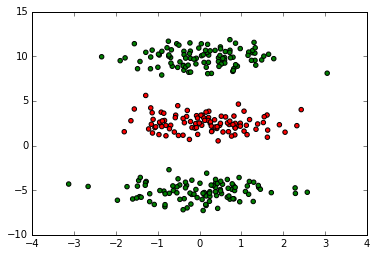

In [160]:
data = generate_two_dim_data()
colors = ['red','green']
plt.scatter(x = data[:,0], y = data[:,1], c = data[:,-1], cmap=clr.ListedColormap(colors))

### Delta rule

In [10]:
def delta(data, weights, n):
    inner_matrix = (np.dot(weights,np.transpose(data[:,:-1]))-data[:,-1])
    return n*np.dot(inner_matrix,data[:,:-1])

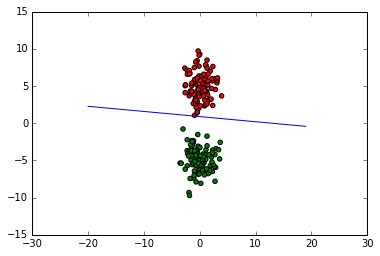

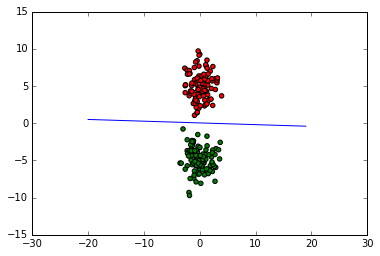

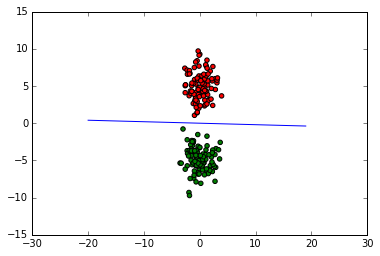

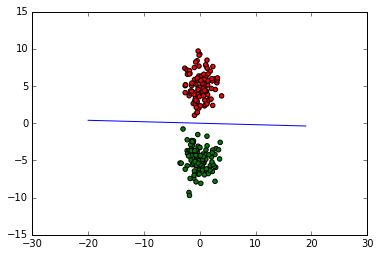

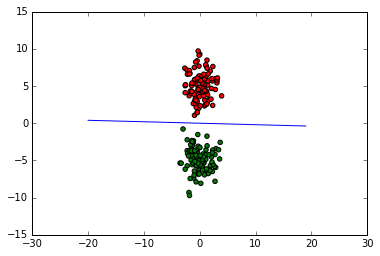

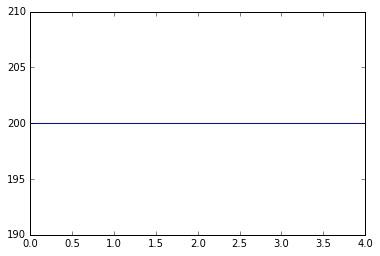

In [11]:
initialize_and_run(data,delta)

### Perceptron learning

In [12]:
def perceptron(data, weights, n):
    prediction = predict(weights,data)
    perceptron_matrix = prediction-data[:,-1]
    return np.dot(perceptron_matrix,data[:,:-1])*-n

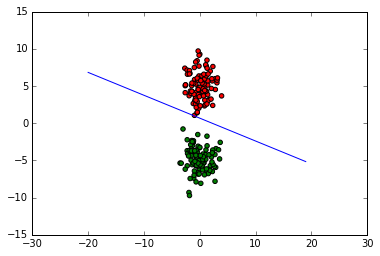

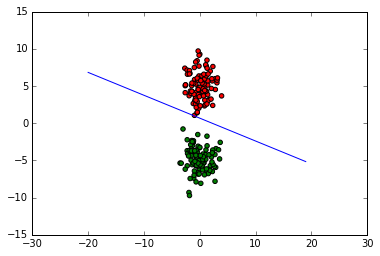

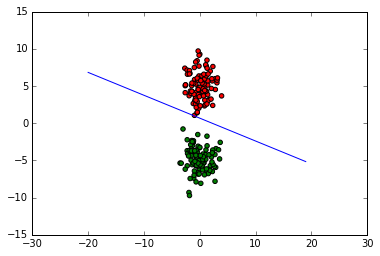

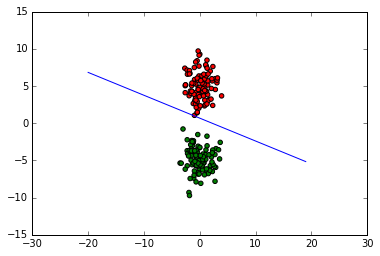

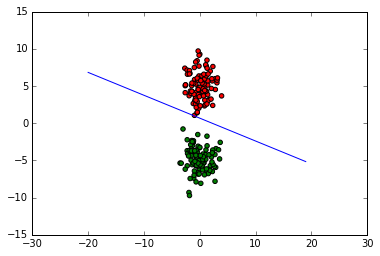

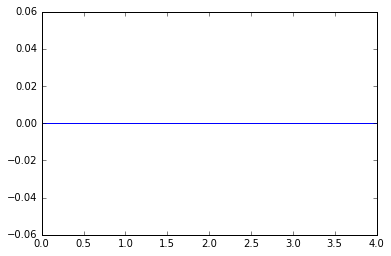

In [13]:
initialize_and_run(data, perceptron)

### Two layer network

In [400]:
class Two_layer_net():
    def __init__(self, data, response, nodecount):
        self.data = data
        self.response = response
        self.nodecount = nodecount
        self.layer_one = np.random.normal(0,1,[np.shape(self.data)[1],nodecount])
        self.layer_two = np.random.normal(0,1,[nodecount+1,1])
        self.transfer_function = np.vectorize(lambda x: 2/(1+np.exp(-x))-1)
        self.errors = []

    def forward_pass(self, data):
        inner_matrix = self.transfer_function(np.dot(data,self.layer_one))
        output_hidden = np.c_[inner_matrix, np.ones(len(inner_matrix))]
        output = self.transfer_function(np.dot(output_hidden, self.layer_two))
        return output, output_hidden

    def backwards_pass(self, output, output_hidden):
        delta_output = np.multiply(np.add((output),-np.transpose([self.response])), self.transfer_derivative(output))
        delta_hidden = np.multiply(np.transpose(np.dot(self.layer_two,np.transpose(delta_output))), self.transfer_derivative(output_hidden))
        return delta_output, delta_hidden
    
    def transfer_derivative(self, x):
        f = self.transfer_function(x)
        return np.divide(np.multiply((1+f),(1-f)),2)
    
    def calculate_errors(self, prediction):
        x = np.transpose(prediction)*(self.response)
        return np.count_nonzero(x == -1)
    
    def update_weights(self, learning_rate):
        
        output, output_hidden = self.forward_pass(self.data)
        delta_output, delta_hidden = self.backwards_pass(output, output_hidden)
        
        deltaweight1 = -learning_rate*np.dot(np.transpose(self.data),delta_hidden)[:,:-1]
        deltaweight2 = -learning_rate*np.dot(np.transpose(output_hidden),delta_output)
        
        self.layer_one = self.layer_one + deltaweight1
        self.layer_two = self.layer_two + deltaweight2
        
    def train(self, iterations, learning_rate):
        self.errors = []
        for i in range(iterations):
            self.update_weights(learning_rate)
            prediction = self.predict(self.data)
            self.errors.append(self.calculate_errors(prediction))
    
    def predict(self, x):
        output, _ = self.forward_pass(x)
        prediction = output
        prediction[prediction>0] = 1
        prediction[prediction<=0] = -1
        return prediction
    
    def plot_learning_rate(self):
        plt.plot(self.errors)
        plt.show
        
    def plot_decision_boundary(self, points = True, h = 0.1):
        x_min, x_max = self.data[:, 0].min() - 1, self.data[:, 0].max() + 1
        y_min, y_max = self.data[:, 1].min() - 1, self.data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        grid_data = np.c_[xx.ravel(), yy.ravel()]
        ones = np.ones((np.shape(xx)[0]*np.shape(xx)[1],1))
        grid_data = np.hstack((grid_data,ones))
        Z = network.predict(grid_data)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        if points:
            plt.scatter(self.data[:, 0], self.data[:, 1], c = data[:,-1], cmap=clr.ListedColormap(['red','green']))
        plt.show()
    

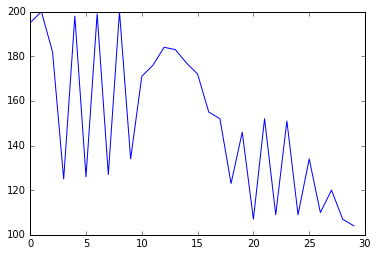

In [425]:
data = generate_two_dim_data()
network = Two_layer_net(data[:,:-1], data[:,-1], nodecount = 14)
network.train(30,0.001)
network.plot_learning_rate()

### Generate 8 dimensional data

In [207]:
data = np.ones((8,8))

In [208]:
for x in range(8):
    data[x,x] = -1
data = data*-1
labels1 = np.ones((4,1))
labels2 = np.ones((4,1))*-1
labels = np.vstack((labels1,labels2))
data = np.hstack((data,np.ones((8,1)),labels))
data = shuffle(data)

In [209]:
np.shape(data)

(8, 10)

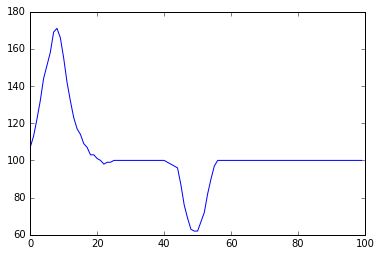

In [408]:
network = Two_layer_net(data[:,:-1], data[:,-1], nodecount = )
network.train(100,0.001)
network.plot_learning_rate()

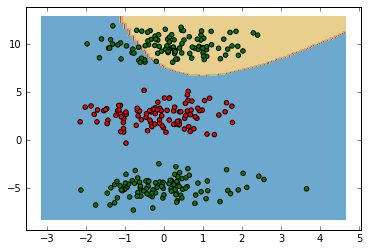

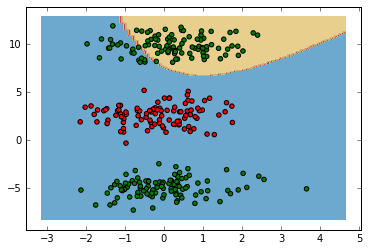

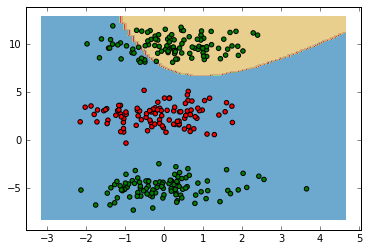

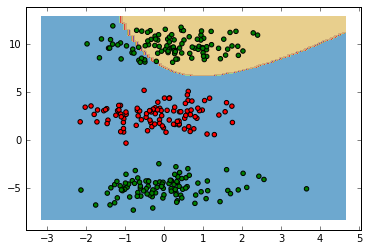

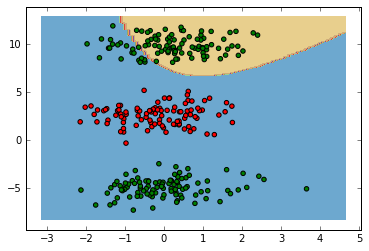

In [415]:
for i in range(5):
    network.train(1,0.0001)
    network.plot_decision_boundary()

### Plot decision boundaries

In [213]:
data = generate_two_dim_data()

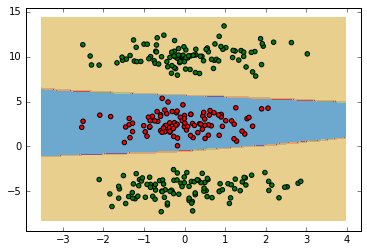

In [325]:
network = Two_layer_net(data[:,:-1], data[:,-1], nodecount = 15)
network.train(500,0.0005)
network.plot_decision_boundary()

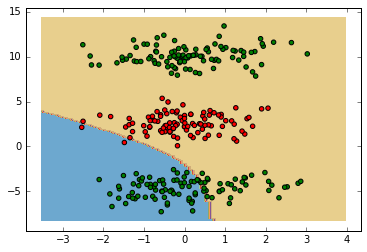

In [395]:
network.train(50,0.005)
network.plot_decision_boundary()

### Function approximation

In [372]:
step = 0.05
xx, yy = np.meshgrid(np.arange(-0.5, 0.5, step),np.arange(-0.5, 0.5, step))
grid_data = np.c_[xx.ravel(), yy.ravel()]
ones = np.ones((np.shape(xx)[0]*np.shape(xx)[1],1))
z = (np.exp(-(grid_data[:,0]**2+grid_data[:,1]**2)/10)-0.5).reshape(len(ones),1)
grid_data = np.hstack((grid_data,ones,z))


In [373]:
network = Two_layer_net(grid_data[:,:-1], grid_data[:,-1], nodecount = 15)
network.train(500,0.005)

In [374]:
result, _ = network.forward_pass(grid_data[:,:-1])

In [379]:
result = network.transfer_function(result)

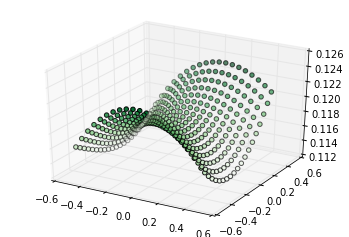

In [380]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx, yy, result, c=result, cmap='Greens');

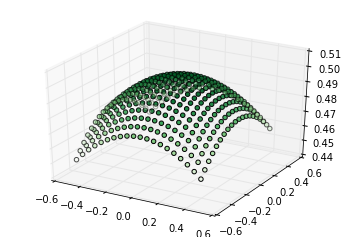

In [376]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata = result
ax.scatter3D(xx, yy, grid_data[:,-1], c=grid_data[:,-1], cmap='Greens');

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# ASSIGNMENT 2